In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sweetviz import analyze
from sklearn.metrics import classification_report

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [388]:
df = pd.read_csv('~/Desktop/masterThesis/investmentfound/dataWithCycle.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df

,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,ManTradeSales_pct_change,InvToSales_pct_change,AvgDurUnem_pct_change,PrimeLendRate_pct_change,CommNndLoansAllBanks_pct_change,OutstandingLoans_pct_change,RealGDP_pct_change,PeriodS,PeriodNum,Period
Date,,,,,,,,,,,,,,,,,,,,,
1978-02-01,-0.024762,87.040001,80.583382,55.708089,1.83,1736,84.3,39.9,31.0,-0.021109,...,0.022934,-0.018169,-0.031008,0.000000,0.011838,0.007123,0.011782,Expansion,1,e
1978-03-01,0.024931,89.209999,81.679709,56.606325,1.86,1799,78.8,40.5,31.8,-0.008034,...,0.010041,-0.001423,-0.008000,0.000000,0.019362,0.021470,0.014430,Expansion,1,e
1978-04-01,0.085416,96.830002,82.740000,57.636083,2.04,1948,81.6,40.4,35.1,0.018969,...,0.030296,-0.020670,-0.008065,0.000000,0.014816,0.011719,0.011946,Expansion,1,e
1978-05-01,0.004234,97.239998,83.662872,57.620072,1.85,1766,82.9,40.4,22.6,-0.001673,...,-0.000951,0.005095,-0.016260,0.062500,0.024245,0.021821,0.005989,Expansion,1,e
1978-06-01,-0.017585,95.529999,84.457336,57.896853,1.61,1983,80.0,40.6,20.1,-0.020218,...,0.005543,-0.002172,0.000000,0.058824,0.005730,0.014484,0.002194,Expansion,1,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,0.000053,4132.149902,627.906672,122.021346,1.94,1695,58.4,41.2,16.1,-0.011752,...,-0.006710,0.013140,-0.092742,0.142857,0.017058,0.010960,0.001508,Expansion,1,e
2022-06-01,-0.083920,3785.379883,632.005561,121.721602,1.48,1696,50.0,41.0,-7.4,0.028894,...,-0.003379,0.008874,-0.008889,0.187500,0.023197,0.014029,0.002583,Expansion,1,e
2022-07-01,0.091116,4130.290039,628.880000,121.286936,0.66,1685,51.5,41.1,-12.4,0.011558,...,0.006415,-0.006089,-0.008969,0.157895,0.010394,0.008800,0.003900,Expansion,1,e


In [389]:
def add_lags(df):
    target_map = df['YOYCoreCPI'].to_dict()
    df['YOYCoreCPI_lag3'] = (df.index - pd.offsets.MonthBegin(3)).map(target_map)
    df['YOYCoreCPI_lag6'] = (df.index - pd.offsets.MonthBegin(6)).map(target_map)
    return df

df = add_lags(df)

df=df.dropna()
df

,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,AvgDurUnem_pct_change,PrimeLendRate_pct_change,CommNndLoansAllBanks_pct_change,OutstandingLoans_pct_change,RealGDP_pct_change,PeriodS,PeriodNum,Period,YOYCoreCPI_lag3,YOYCoreCPI_lag6
Date,,,,,,,,,,,,,,,,,,,,,
1978-08-01,0.025924,103.290001,85.822536,57.639846,0.92,1691,78.4,40.5,21.7,-0.010337,...,-0.050000,0.027778,0.008834,0.010662,0.004006,Expansion,1,e,0.067657,0.061977
1978-09-01,-0.007261,102.540001,86.556872,57.461163,0.63,1751,80.4,40.5,-0.8,-0.013000,...,0.000000,0.054054,0.007529,0.016102,0.005105,Expansion,1,e,0.068852,0.063333
1978-10-01,-0.091574,93.150002,87.490000,57.818991,0.12,1781,79.3,40.5,0.7,-0.064843,...,0.026316,0.051282,0.010902,0.011661,0.004271,Expansion,1,e,0.071895,0.066335
1978-11-01,0.016640,94.699997,88.698835,58.355259,-0.21,1795,75.0,40.6,10.5,0.086072,...,-0.051282,0.121951,0.012872,0.018101,0.002018,Expansion,1,e,0.074797,0.067657
1978-12-01,0.014889,96.110001,90.059989,58.759215,-0.30,1818,66.1,40.5,-9.1,-0.041233,...,-0.045045,0.021739,0.001635,0.014868,0.000275,Expansion,1,e,0.079288,0.068852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,0.000053,4132.149902,627.906672,122.021346,1.94,1695,58.4,41.2,16.1,-0.011752,...,-0.092742,0.142857,0.017058,0.010960,0.001508,Expansion,1,e,0.064157,0.049526
2022-06-01,-0.083920,3785.379883,632.005561,121.721602,1.48,1696,50.0,41.0,-7.4,0.028894,...,-0.008889,0.187500,0.023197,0.014029,0.002583,Expansion,1,e,0.064360,0.054766
2022-07-01,0.091116,4130.290039,628.880000,121.286936,0.66,1685,51.5,41.1,-12.4,0.011558,...,-0.008969,0.157895,0.010394,0.008800,0.003900,Expansion,1,e,0.061337,0.060408


In [390]:
# Extract the features and labels
X = df[
    ['SP500', 
    'HousePriceIndex', 
    'RetailTrade', 
    #'IRSpread', 
    'BuildingPermits', 
    'ConsumerSentiment', 
    'AvgWeeklyHoursProd',
    #'FutureNewOrders',
    #'DollarIndex',
    'ThreemonthsIR',
    #'FiveyearsIR',
    #'TenyearsIR',
    'ThirtyyearsIR',
    'IndProdInd',
    'DispPersIncome',
    'RealGDP',
    'ManTradeSales',
    'InvToSales',
    'AvgDurUnem',
    'YOYCoreCPI',
    #'YOYCoreCPI_lag3',
    #'YOYCoreCPI_lag6',
    'PrimeLendRate',
    'ConsumerDebtToIncome',
    'CommNndLoansAllBanks',
    'OutstandingLoans'
    #'HousePriceIndex_pct_change',
    #'RetailTrade_pct_change',
    #'BuildingPermits_pct_change',
    #'ConsumerSentiment_pct_change',
    #'AvgWeeklyHoursProd_pct_change',
    #'FutureNewOrders_pct_change',
    #'ThreemonthsIR_pct_change',
    #'FiveyearsIR_pct_change',
    #'TenyearsIR_pct_change',
    #'ThirtyyearsIR_pct_change',
    #'IndProdInd_pct_change',
    #'DispPersIncome_pct_change',
    #'ManTradeSales_pct_change',
    #'InvToSales_pct_change',
    #'AvgDurUnem_pct_change',
    #'PrimeLendRate_pct_change',
    #'CommNndLoansAllBanks_pct_change',
    #'PrimeLendRate_pct_change',
    #'CommNndLoansAllBanks_pct_change',
    #'OutstandingLoans_pct_change',
    #'RealGDP_pct_change'
    ]
    ] # features
y = df['Period'] == "r" # labels

f"Shapes of X={X.shape} y={y.shape}, Recession periods={y.sum()}"

'Shapes of X=(530, 19) y=(530,), Recession periods=54'

In [391]:
report = analyze(X)
report.show_html()

/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sweetviz/seri

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [392]:
train_test_split_date = '01-01-2005'

train = df.loc[df.index < train_test_split_date]
test = df.loc[df.index >= train_test_split_date]

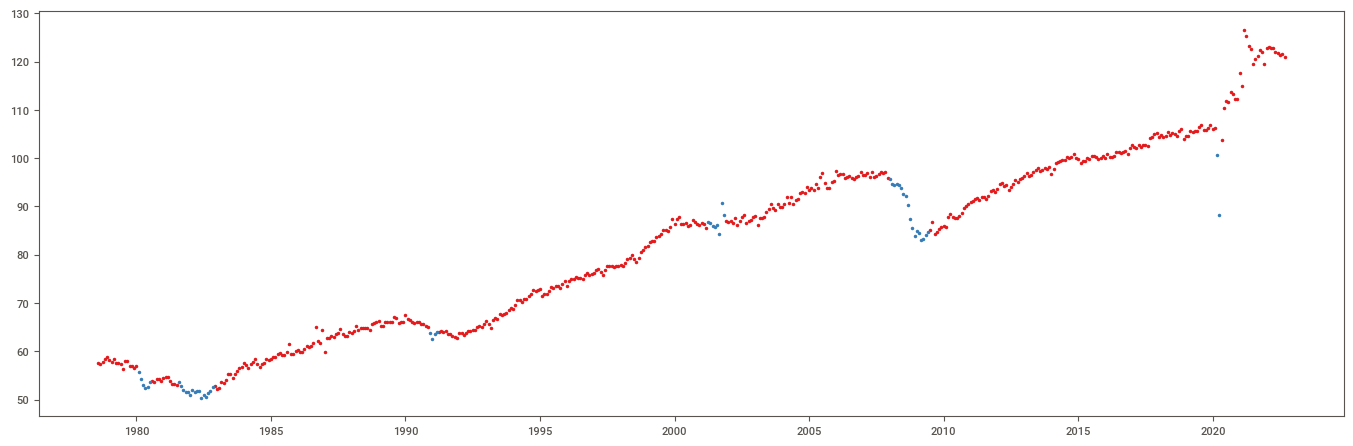

In [393]:
# Create a colormap
cmap = plt.cm.get_cmap('Set1')

# Get a list of the unique classes
classes = df['Period'].unique()

# Create a figure with a specific size
plt.figure(figsize=(15, 5))

# Plot the data, coloring the line based on the class column
for i, c in enumerate(classes):
    mask = df['Period'] == c
    plt.plot(df[mask]['RetailTrade'], '.', color=cmap(i))

plt.show()

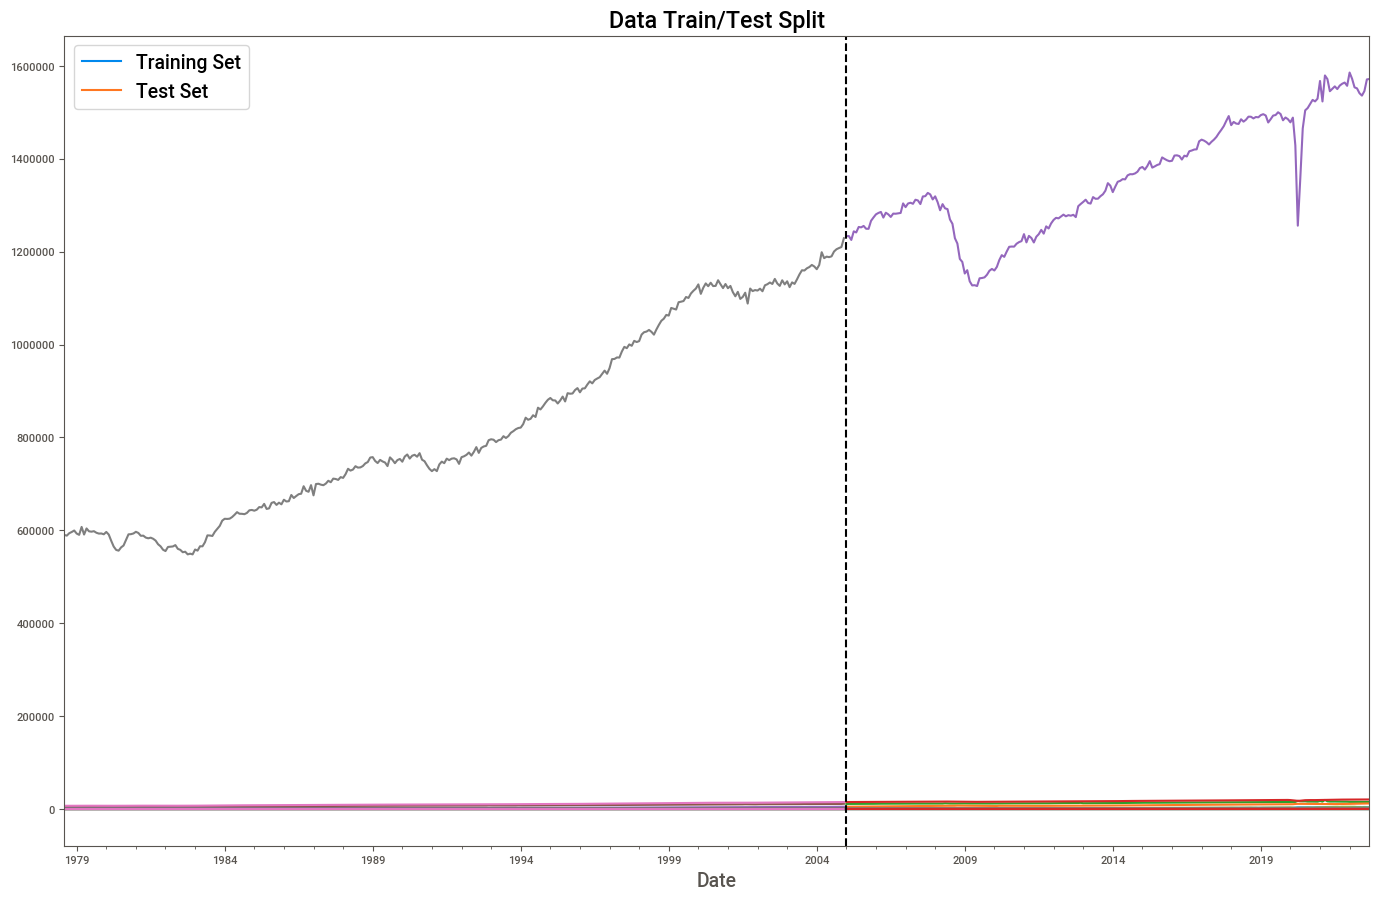

In [394]:
fig, ax = plt.subplots(figsize=(15, 10))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline(train_test_split_date, color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [395]:
X_train = X.loc[X.index < train_test_split_date].values
X_test = X.loc[X.index >= train_test_split_date].values
y_train = y.loc[y.index < train_test_split_date].values
y_test = y.loc[y.index >= train_test_split_date].values

In [396]:
model = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.05, max_depth=3, subsample=0.5, validation_fraction=0.1, n_iter_no_change=20, max_features='log2', verbose=1, random_state=42)

model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6281           0.0652           16.03s
         2           0.5772           0.0431            9.89s
         3           0.5551           0.0215            7.25s
         4           0.4559           0.0214            5.91s
         5           0.3771           0.0293            5.01s
         6           0.4365           0.0248            4.43s
         7           0.3770           0.0205            4.02s
         8           0.3827           0.0118            3.80s
         9           0.3798           0.0163            3.61s
        10           0.3525           0.0135            3.41s
        20           0.1978           0.0049            2.47s
        30           0.1727           0.0023            2.11s
        40           0.1084          -0.0002            1.92s
        50           0.0869           0.0038            1.79s
        60           0.0838           0.0005            1.71s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           random_state=42, subsample=0.5, verbose=1)

In [397]:
len(model.estimators_)

229

In [398]:
y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred)))

AUC Train: 1.0000
AUC Valid: 0.9492


/Users/zigatrontelj/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


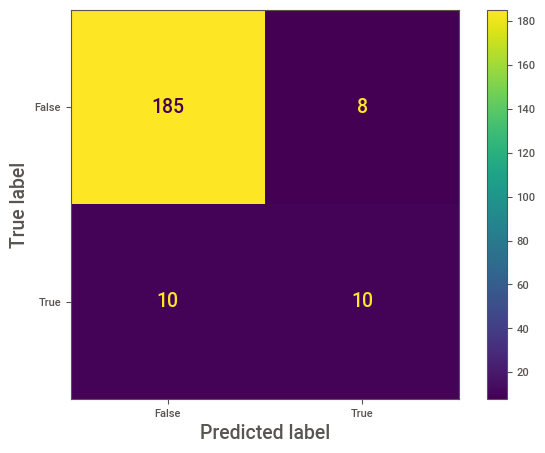

In [399]:
plot_confusion_matrix(model, X_test, y_test)

In [400]:
# make predictions on the test set
y_pred = model.predict(X_test)

# generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.95      0.96      0.95       193
        True       0.56      0.50      0.53        20

    accuracy                           0.92       213
   macro avg       0.75      0.73      0.74       213
weighted avg       0.91      0.92      0.91       213



In [401]:
y_train_pred_trees = np.stack(list(model.staged_predict_proba(X_train)))[:,:,1]
y_valid_pred_trees = np.stack(list(model.staged_predict_proba(X_test)))[:,:,1]

y_train_pred_trees.shape, y_valid_pred_trees.shape

((229, 317), (229, 213))

In [402]:
auc_train_trees = [roc_auc_score(y_train, y_pred) for y_pred in y_train_pred_trees]
auc_valid_trees = [roc_auc_score(y_test, y_pred) for y_pred in y_valid_pred_trees]

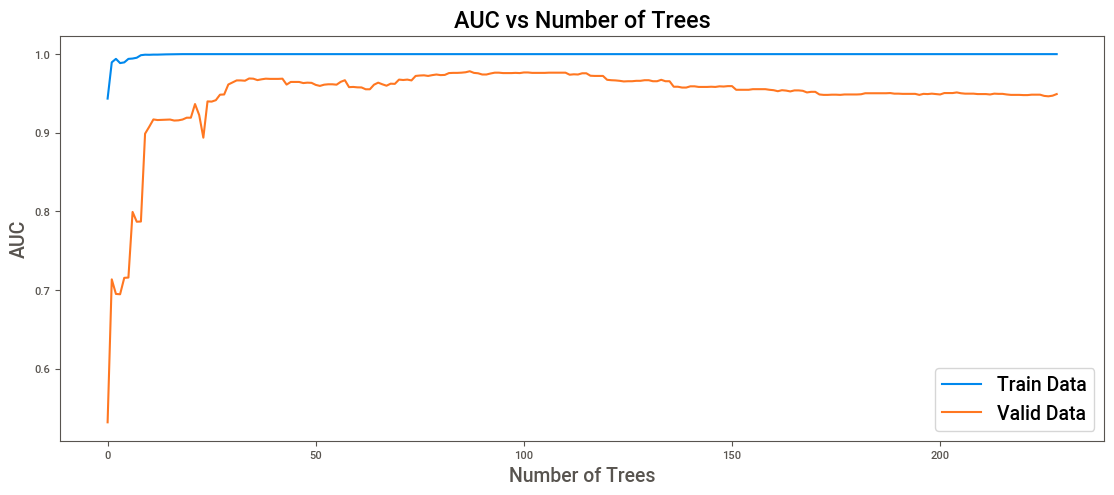

In [403]:
plt.figure(figsize=(12,5))

plt.plot(auc_train_trees, label='Train Data')
plt.plot(auc_valid_trees, label='Valid Data')

plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()

plt.show()

In [404]:
var_columns = [c for c in X.columns if c not in ['Period']]

imp = model.feature_importances_

pd.DataFrame({"Variable_Name":var_columns,
              "Importance":model.feature_importances_}) \
            .sort_values('Importance', ascending=False)

,Variable_Name,Importance
12,InvToSales,0.219342
5,AvgWeeklyHoursProd,0.089758
3,BuildingPermits,0.083559
11,ManTradeSales,0.072018
2,RetailTrade,0.068967
14,YOYCoreCPI,0.063315
16,ConsumerDebtToIncome,0.059061
0,SP500,0.057564
13,AvgDurUnem,0.039939
1,HousePriceIndex,0.039195


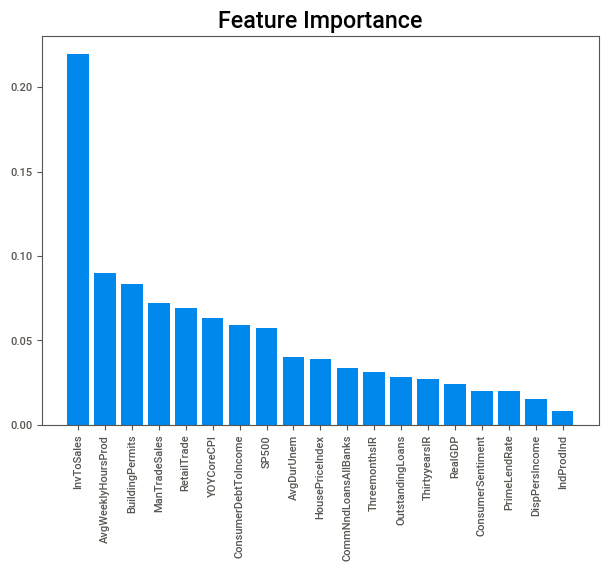

In [405]:
var_columns = [c for c in X.columns if c not in ['Period']]

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importances
names = [var_columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [407]:


test['prediction'] = model.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

test

/var/folders/60/dkdrnsws0wqd_ks459r26yg40000gn/T/ipykernel_35943/610189928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(X_test)


,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,PrimeLendRate_pct_change,CommNndLoansAllBanks_pct_change,OutstandingLoans_pct_change,RealGDP_pct_change,PeriodS,PeriodNum,Period,YOYCoreCPI_lag3,YOYCoreCPI_lag6,prediction
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-0.025290,1181.270020,333.740000,93.410036,2.14,2139,95.5,40.7,36.2,0.034014,...,0.000000,0.009291,0.006174,0.003105,Expansion,1,e,0.020103,0.017580,False
2005-02-01,0.018903,1203.599976,337.065877,93.813791,1.99,2114,94.1,40.7,31.4,-0.013038,...,0.047619,0.011148,0.011402,0.001905,Expansion,1,e,0.022165,0.017045,False
2005-03-01,-0.019118,1180.589966,340.692207,93.464062,2.03,2062,92.6,40.4,37.1,0.018786,...,0.045455,0.017142,0.012003,0.001329,Expansion,1,e,0.022657,0.019618,False
2005-04-01,-0.020109,1156.849976,344.430000,94.643976,1.69,2150,87.7,40.4,32.9,0.004402,...,0.000000,0.013560,0.007952,0.001624,Expansion,1,e,0.022610,0.020103,False
2005-05-01,0.029952,1191.500000,348.107961,93.752577,1.43,2085,86.9,40.4,19.6,0.039441,...,0.043478,0.014523,0.007352,0.002508,Expansion,1,e,0.023089,0.022165,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,0.000053,4132.149902,627.906672,122.021346,1.94,1695,58.4,41.2,16.1,-0.011752,...,0.142857,0.017058,0.010960,0.001508,Expansion,1,e,0.064157,0.049526,False
2022-06-01,-0.083920,3785.379883,632.005561,121.721602,1.48,1696,50.0,41.0,-7.4,0.028894,...,0.187500,0.023197,0.014029,0.002583,Expansion,1,e,0.064360,0.054766,False
2022-07-01,0.091116,4130.290039,628.880000,121.286936,0.66,1685,51.5,41.1,-12.4,0.011558,...,0.157895,0.010394,0.008800,0.003900,Expansion,1,e,0.061337,0.060408,False
